# CC3001 Otoño 2023 Tarea  [Marco Martínez S. 21.003.570-2]


# Calculadora

### Profesores
Sección 1 Iván Sipirán •
Sección 2 Patricio Poblete •
Sección 3 Nelson Baloian




# Enunciado

Esta tarea consiste en desarrollar una calculadora de expresiones matemáticas al estilo Matlab o Maple, pero con capacidad de procesar un conjunto de comandos bien restringido. Algunos ejemplos de los comandos que acepta y de lo que debe imprimir en la salida van a continuación:

|Entrada (lo que el usuario escribe)   | Salida(lo que imprime el programa)  |
|---|---|
|n=5   | 5  |
|hanoi=2^n-1    |31   |
|var_1 = 23 - 13 + hanoi * 2    |82   |
|h2 = hanoi /2   |15   |
|n   |5   |

A continuación definimos más en detalle lo que se debe implementar:



1.   Cada comando es de la forma "variable=expresión". El efecto es que se debe calcular la expresión de la derecha, guardar el resultado en la variable de la izquierda e imprimir el resultado en la salida. Si se omite desde el "=" hacia adelante (como en el último ejemplo), solo se imprime el valor de la variable. Las variables comienzan con letra y continúan con letras, dígitos y el signo "_".
2.   Los operadores permitidos son "+","-","*", "/", "^".
3.   Solo se trabaja con números enteros y todas las operaciones dan resultado entero (incluyendo la división, que trunca).
4.   Para simplificar, no se puede usar paréntesis y la expresión se evalúa estrictamente de izquierda a derecha. Eso explica el resultado que se obtiene para "var_1".
5.   Si se utiliza una variable que aún no ha sido definida, se debe dar un error

      ERROR: variable indefinida "..."

6.   Si la sintaxis no es correcta, se debe imprimir en la salida un mensaje de la forma

      ERROR: al procesar "..."

      donde el string que se imprime es la parte de la entrada desde el punto del error hacia adelante.


Antes de empezar a escribir código, usted debe dibujar un diagrama de estados que describa la estructura de la entrada. Si le resulta más conveniente, pueden ser varios diagramas (por ejemplo, uno que describa la estructura de una variable, otro la de un número, otra la de un comando). Luego, a partir de ahí escriba el código que implementa esos diagramas. **Importante:** Su código debe ir procesando de un caracter a la vez, para este procesamiento no se puede utilizar funciones de Python que operen sobre strings de largo mayor que uno. Se recomienda tener una función que reciba un comando en un string y lo procese, y otra que se encargue de ir leyendo líneas una a una e invocando a la función antes mencionada para procesarlas.

Para almacenar los nombres y valores de las variables, está permitido el uso de un diccionario de Python.

En su entrega debe describir brevemente el problema, luego describir la estrategia de solución a través de los diagramas de estados, y a continuación el código ejecutable respectivo, agregando todas las explicaciones necesarias para que se entienda.



# Diagrama de estado.
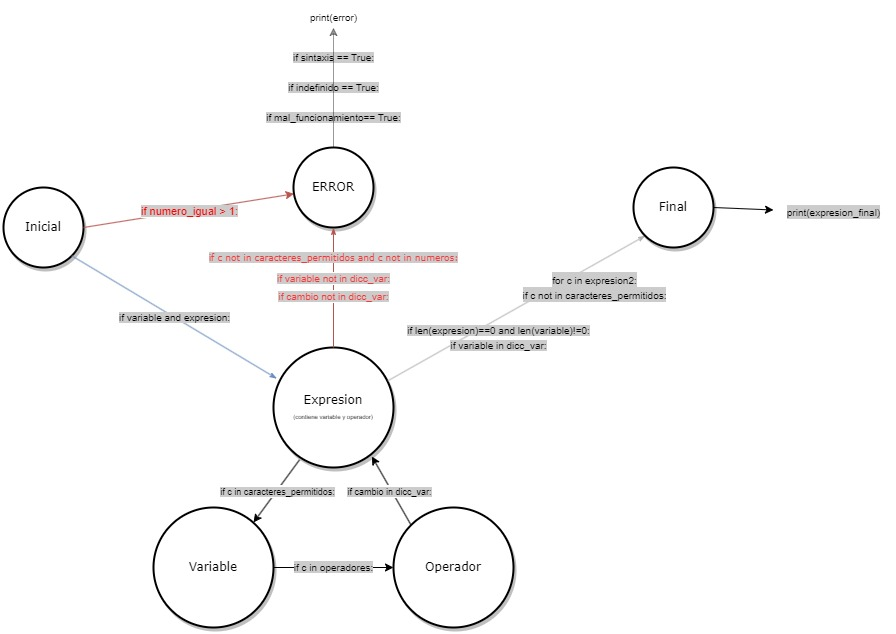

In [ ]:
# Esta función recibe un comando en string y el diccionario de variables. Con él,
# procesa el comando, imprime el resultado de la expresion
# y posiblemente modifica el diccionario. La función retorna el diccionario

def procesar_comando(comando, dicc_var):
    # procesa el comando e imprime el resultado

    #FUNCIONES AUXILIARES
    #Funcion que se encarga de operar resultado y numero_c.
    def operar(x, y, operador):
        if operador == "+":
            resultado = x + y
        elif operador == "-":
            resultado = x - y
        elif operador == "*":
            resultado = x * y
        elif operador == "/":
            resultado = x // y
        elif operador == "^":
            resultado = x ** y
        return resultado

    #Funcion que se encarga de calcular el resultado de la expresión.
    def evaluar_expresion(expresion):
        resultado = 0
        operador = "+"
        numero_c = ""
        for c in expresion:
            if c in numeros:
                numero_c += c
            elif c in operadores:
              resultado = operar(resultado, int(numero_c), operador)
              operador = c
              numero_c = ""
        if numero_c:
          resultado = operar(resultado, int(numero_c), operador)
        return resultado

    #VARIABLES GLOBALES.
    estado = "Inicial"
    numeros = "1234567890"
    caracteres_permitidos = "abcdefghijklmnopqrstuvwxyz_"
    operadores = "+-*/^"
    espacio = " "
    sintaxis = None
    indefinido = None
    mal_funcionamiento = None
    error = ""

    #Separamos el comando en variable y expresión.
    variable = ""
    expresion = ""
    expresion2 = ""
    separador = False
    numero_de_igual = 0
    if estado == "Inicial":
        for c in comando:
            if c == "=":
                separador = True
                numero_de_igual += 1
            elif separador==False and numero_de_igual==0:
              if c == espacio:
                continue
              else:
                variable += c
                estado = "Expresion"
            elif separador==True and numero_de_igual==1:
              if c == espacio:
                continue
                estado = "Expresion"
              else:
                expresion += c
                estado = "Expresion"
            elif numero_de_igual > 1:
                sintaxis = True
                error = "="
                estado = "Error"

    #Errores.
    #Error de sintaxis de variable.

    if estado == "Expresion":
      for c in variable:
        if c not in caracteres_permitidos and c not in numeros:
          estado = "Error"
          sintaxis = True
        if estado == "Error":
          error += str(c)
        else:
          continue

      if len(variable)==0:
        return dicc_var
      if len(expresion)==0 and len(variable)!=0:
        if variable in dicc_var:
          estado = "Final"
        else:
          estado = "Error"
          error = variable
          indefinido = True


    #Cambiamos las variables por su valor en el diccionario.
    cambio = ""
    if estado == "Expresion":
        for c in expresion:
          if c in caracteres_permitidos:
            estado = "Variable"
          if estado == "Variable":
            if c in operadores:
              estado = "Operador"
            else:
              cambio += str(c)
          if estado == "Operador":
            if cambio in dicc_var:
              cambio = dicc_var[cambio]
              expresion2 += str(cambio)
              expresion2 += str(c)
              estado = "Expresion"
            else:
              print("ERROR: Variable indefinida "+ '"'+ cambio + '"')
              cambio = ""
              expresion2 = ""
              estado = "Error"
              break
          elif estado == "Expresion":
            expresion2 += str(c)

    #Comprobamos que se hicieron todos los reemplazos.
    if estado == "Expresion":
      for c in expresion2:
        if c not in caracteres_permitidos:
          estado = "Final"
        else:
          mal_funcionamiento = True
          estado = "Error"

    #Estado de error.
    if estado == "Error":
      if indefinido == True:
        print("ERROR: variable indefinida " + '"' + error + '"')
      if sintaxis == True:
        print("ERROR: al procesar " + '"' + error + '"')
      elif mal_funcionamiento == True:
        print("ERROR DE FUNCIONAMIENTO")


    #Añadimos variable y expresión al diccionario.
    expresion_final = None
    if estado == "Final":
      if len(expresion)==0 and len(variable)!=0:
        print(dicc_var[variable])
      else:
        expresion_final = evaluar_expresion(expresion2)
        dicc_var[variable] = expresion_final
        print(expresion_final)

    return dicc_var

def calculadora(lista_comandos):
  # Este diccionario almacena las variables que se vayan definiendo en la calculadora
  # Este diccionario se inicializa cuando se usa la calculadora
  vars = dict()
  #Se procesan todos los comandos de la lista (lista de string)
  for i in range(0, len(lista_comandos)):
    vars = procesar_comando(lista_comandos[i], vars)

## Ejemplo 1

In [ ]:
lista = ["n==5"]
calculadora(lista)

ERROR: al procesar "="


In [ ]:
# EJEMPLO 1:
lista = ["n=5","hanoi=2^n-1","var_1 = 23 - 13 + hanoi * 2","h2 = hanoi /2","","n"]
calculadora(lista)

5
31
82
15
5


El resultado del ejemplo anterior debería imprimir en pantalla

   5

   31

   82

   15

   5



## Ejemplo 2

In [ ]:
# EJEMPLO 1:
lista = ["n=5","hanoi=2^n-1","var_1 = 23 - 13 + hanoi2 * 2","h2 = hanoi /2","","n"]
calculadora(lista)

5
31
ERROR: Variable indefinida "hanoi2"
15
5


El resultado del ejemplo anterior debería imprimir en pantalla

5

31

ERROR: variable indefinida "hanoi2"

15

5

## ¿Qué hay que entregar?

Usted debe crear una copia de este documento (del menú seleccionar "Archivo" o "File" y de ahi la opción "guardar copia en Drive" o "save a copy in Drive"). Este nuevo documento (notebook de Colab) es el que debe modificar para luego compartirlo con la opción "Cualquier usuario de internet con este enlace puede ver esto" (o “Anyone on the internet with this link can view”). Esta opción se encuentra disponible en la parte superior derecha de su notebook, en el botón "Compartir" (o "Share"). Una vez que tenga disponible el enlace, colocarlo en la descripción de la entrega de su tarea. No olvide colocar su nombre dentro del notebook.